In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
training_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

In [3]:
training_set.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_set.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
x_train = training_set.iloc[:, 1:].values
y_train = training_set.iloc[:, 0:1].values
x_test = test_set.iloc[:, :].values

In [6]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [7]:
x_train = x_train/255.
x_test = x_test/255.

In [8]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, num_classes = 10)
y_train

Using TensorFlow backend.


array([[ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]], dtype=float32)

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

In [19]:
classifier = Sequential()

classifier.add(Conv2D(32, (5, 5), padding = 'Same', input_shape = (28, 28, 1), activation = 'relu'))
#classifier.add(MaxPool2D(pool_size = (2, 2)))

#classifier.add(Conv2D(32, (5, 5), padding = 'Same', activation = 'relu'))
classifier.add(MaxPool2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))

classifier.add(Conv2D(64, (3, 3),padding = 'Same', activation = 'relu'))
classifier.add(MaxPool2D(pool_size = (2, 2)))

#classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
#classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())

classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(0.1))

classifier.add(Dense(units = 10, activation = 'sigmoid'))

In [20]:
classifier.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [21]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)
datagen.fit(x_train)

In [22]:
track = classifier.fit_generator(datagen.flow(x_train,y_train, batch_size= 128),
                              epochs = 30, steps_per_epoch=x_train.shape[0]//128)

Epoch 1/30
328/328 [==============================] - 55s 168ms/step - loss: 0.5714 - acc: 0.8171
Epoch 2/30
328/328 [==============================] - 53s 163ms/step - loss: 0.1645 - acc: 0.9497
Epoch 3/30
328/328 [==============================] - 53s 162ms/step - loss: 0.1110 - acc: 0.9659
Epoch 4/30
328/328 [==============================] - 54s 165ms/step - loss: 0.0921 - acc: 0.9729
Epoch 5/30
328/328 [==============================] - 55s 169ms/step - loss: 0.0781 - acc: 0.9759
Epoch 6/30
328/328 [==============================] - 53s 161ms/step - loss: 0.0691 - acc: 0.9792
Epoch 7/30
328/328 [==============================] - 53s 163ms/step - loss: 0.0579 - acc: 0.9827
Epoch 8/30
328/328 [==============================] - 56s 169ms/step - loss: 0.0590 - acc: 0.9824
Epoch 9/30
328/328 [==============================] - 53s 161ms/step - loss: 0.0487 - acc: 0.9848
Epoch 10/30
328/328 [==============================] - 53s 162ms/step - loss: 0.0509 - acc: 0.9846
Epoch 11/30
328/328

In [23]:
track.history.keys()

dict_keys(['loss', 'acc'])

Text(0.5,1,'Model Accuracy')

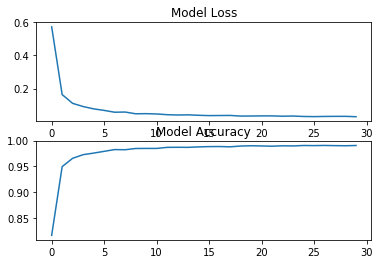

In [24]:
plt.subplot(2, 1, 1)
plt.plot(track.history['loss'])
plt.title("Model Loss")

plt.subplot(2, 1, 2)
plt.plot(track.history['acc'])
plt.title("Model Accuracy")

In [25]:
predict = classifier.predict(x_test)
predict

array([[  5.66119512e-11,   1.30152306e-10,   7.25490376e-02, ...,
          7.15684845e-10,   1.06165547e-08,   2.98476160e-10],
       [  1.77433699e-01,   6.92257412e-15,   4.31186953e-09, ...,
          9.06352424e-11,   1.57209612e-07,   2.77150889e-06],
       [  1.00481858e-14,   9.91578950e-15,   1.81347957e-11, ...,
          2.42467136e-12,   1.79248349e-09,   1.45931961e-02],
       ..., 
       [  3.81185491e-22,   3.82143590e-14,   2.78166433e-13, ...,
          7.24680224e-15,   3.42743993e-11,   7.30707217e-10],
       [  3.55469487e-10,   1.86667346e-13,   6.56696364e-11, ...,
          6.21767260e-09,   3.98219319e-10,   9.86874551e-02],
       [  8.08839755e-16,   1.17142592e-16,   1.19518317e-01, ...,
          1.44646895e-15,   1.11547230e-11,   1.32062343e-13]], dtype=float32)

In [26]:
predict = np.argmax(predict, axis = 1)

In [27]:
predict

array([2, 0, 9, ..., 3, 9, 2])

In [28]:
submit = pd.DataFrame(predict, columns = ['Label'])
submit.reset_index(inplace = True)
submit['index'] = submit['index'] + 1
submit.rename(columns = {'index' : 'ImageId'}, inplace = True)
submit.index = submit['ImageId']
submit = submit.drop('ImageId', axis = 1)

In [29]:
submit.head()

,Label
ImageId,
1,2
2,0
3,9
4,0
5,3


In [30]:
submit.to_csv('digit_submit.csv')

In [31]:
submit.shape

(28000, 1)

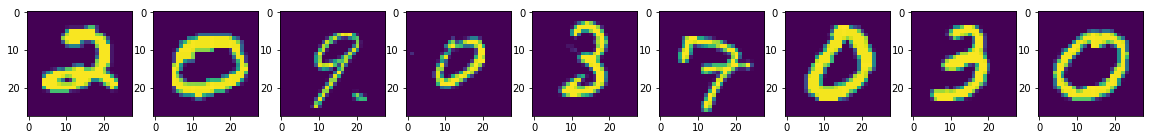

In [32]:
n = 9
plt.figure(figsize = (20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
plt.show()